In [116]:
## setup
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from statsmodels.iolib.summary2 import summary_col
from statsmodels.graphics.regressionplots import plot_partregress
from pathlib import Path

In [126]:
## upload cleaned data
# path setup (choose base)
base_folder = Path().resolve()

data_folder = base_folder / "data"

cleaned_folder = data_folder / "clean_data"

# load data
milk_df_path = cleaned_folder / "milk_df_clean.xlsx"
milk_df = pd.read_excel(milk_df_path)

milk_df_cpi_path = cleaned_folder / "milk_df_inflation_adjusted.xlsx"
milk_df_inflation = pd.read_excel(milk_df_cpi_path)

milk_df_inflation

,Year,State,Organic,milk_sold,gross_value,feed_costs,marketing_costs,operating_costs,overhead,total_costs,cows_per_farm,output_per_cow,cpi_index
0,2005,Minnesota,1,20.88,23.17,10.11,0.43,14.30,16.31,30.61,59,13058,1.000000
1,2005,New York,1,24.03,26.87,13.08,0.24,16.63,21.37,38.00,53,10956,1.000000
2,2005,Pennsylvania,1,24.23,26.85,13.23,0.31,17.10,14.61,31.71,46,12177,1.000000
3,2005,Vermont,1,24.23,26.87,13.61,0.24,17.62,18.88,36.50,62,11982,1.000000
4,2005,Wisconsin,1,21.19,23.63,13.47,0.22,17.11,14.95,32.07,65,13101,1.000000
5,2010,Minnesota,1,25.17,27.81,14.01,0.25,17.89,21.99,39.88,36,10542,1.092454
6,2010,New York,1,24.29,27.22,11.58,0.39,16.39,18.10,34.49,73,12880,1.092454
7,2010,Pennsylvania,1,28.37,30.92,14.05,0.23,18.81,20.52,39.33,72,12247,1.092454
8,2010,Vermont,1,25.97,28.61,15.88,0.23,21.05,22.45,43.50,60,12145,1.092454
9,2010,Wisconsin,1,27.90,30.89,14.75,0.19,19.85,21.15,41.00,56,12940,1.092454


In [128]:
### data exploration 

## explore milk_sold
# control for inflation
milk_df["milk_sold_real"] = milk_df["milk_sold"] / milk_df["cpi_index"]

# get average milk_sold by year and organic/nonorganic
trend_nominal = (milk_df.groupby(["Year", "Organic"])["milk_sold"]
                 .mean().reset_index())

trend_real = (milk_df.groupby(["Year", "Organic"])["milk_sold_real"]
              .mean().reset_index())

# create plot
plt.figure(figsize=(10, 6))

# loop for plot (nominal)
for label, grp in trend_nominal.groupby("Organic"):
    plt.plot(grp["Year"], grp["milk_sold"],
             marker = "o", linestyle = "--", linewidth=2,
             label = f"{'Organic' if label == '1' else 'Conventional'} (Nominal)")

# loop for plot (real)
for label, grp in trend_real.groupby("Organic"):
    plt.plot(grp["Year"], grp["milk_sold_real"],
             marker = "o", linewidth=2,
             label=f"{'Organic' if label == '1' else 'Conventional'} (Real 2005$)")

# add plot details
plt.xlabel("Year")
plt.ylabel("Milk Sold ($ per cwt)")
plt.title("Milk Sold Over Time: Nominal vs Real (Inflation Adjusted)")
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'cpi_index'

In [106]:
## analysis (profit model)

# make sure oragnic column is an integer
milk_df["organic_bin"] = milk_df["Organic"].astype(int) 


# compute profit (estimate)
milk_df["profit"] = milk_df["gross_value"] - milk_df["total_costs"]

# create real profit value
milk_df["profit_real"] = milk_df["profit"] / milk_df["cpi_index"]

# OLS regression profit model
profit_model = smf.ols(formula = "profit_real ~ organic_bin",
    data = milk_df).fit()

# return model
profit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            profit_real   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     14.89
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           0.000613
Time:                        12:37:13   Log-Likelihood:                -80.141
No. Observations:                  30   AIC:                             164.3
Df Residuals:                      28   BIC:                             167.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5934      0.935     -1.704      0.099      -3.509       0.322
organic_bin    -5.1029      1.322     -3.859      0.001      -7.812      -2.394
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.203
Skew:                           0.157   Prob(JB):                        0.904
Kurtosis:                       3.253   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
## create table of profit model for paper

# put model selected results into a dataframe
results1_table = pd.DataFrame({"coef": profit_model.params,
                               "std_err": profit_model.bse,
                               "t_value": profit_model.tvalues,
                               "p_value": profit_model.pvalues,
                               "lower_CI": profit_model.conf_int()[0],
                               "upper_CI": profit_model.conf_int()[1]})

# view the table
results1_table

,coef,std_err,t_value,p_value,lower_CI,upper_CI
Intercept,-1.776,1.000265,-1.775529,0.086682,-3.824951,0.272951
organic_bin,-5.354,1.414589,-3.784845,0.000746,-8.251654,-2.456346


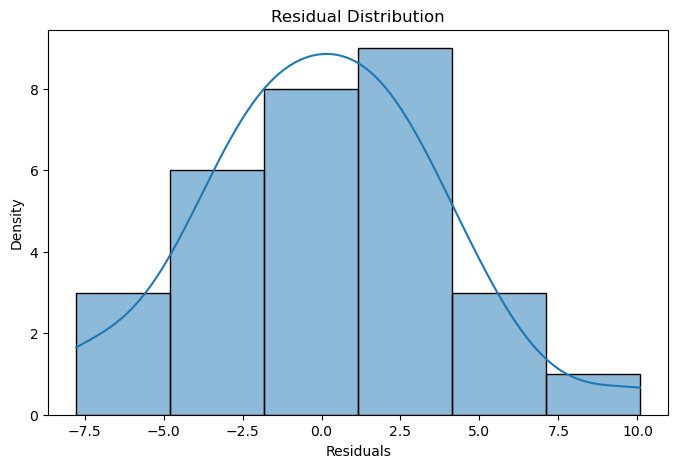

In [44]:
## visual for profit model

# create residuals variable
residuals = profit_model.resid

# plot residuals on a histogram with KDE
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

In [48]:
## analysis (controlled profit model)

# OLS regression controlled profit model (controlling for cost differences)
controlled_profit_model = smf.ols(formula = """profit ~ organic_bin + feed_costs + operating_costs + overhead""",
                                  data = milk_df).fit()

# return model
controlled_profit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     18.33
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           3.80e-07
Time:                        15:03:01   Log-Likelihood:                -67.818
No. Observations:                  30   AIC:                             145.6
Df Residuals:                      25   BIC:                             152.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4983      2.509      1.394      0.176      -1.670       8.666
organic_bin         6.6077      2.363      2.797      0.010       1.742      11.474
feed_costs         -1.3105      0.708     -1.850      0.076      -2.769       0.148
operating_costs     1.3701      0.633      2.165      0.040       0.067       2.673
overhead           -1.3028      0.207     -6.302      0.000      -1.729      -0.877
==============================================================================
Omnibus:                        1.781   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                0.896
Skew:                           0.402   Prob(JB):                        0.639
Kurtosis:                       3.265   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
## create table of profit model for paper

# put model selected results into a dataframe
results2_table = pd.DataFrame({"coef": controlled_profit_model.params,
                               "std_err": controlled_profit_model.bse,
                               "t_value": controlled_profit_model.tvalues,
                               "p_value": controlled_profit_model.pvalues,
                               "lower_CI": controlled_profit_model.conf_int()[0],
                               "upper_CI": controlled_profit_model.conf_int()[1]})

# view the table
results2_table

,coef,std_err,t_value,p_value,lower_CI,upper_CI
Intercept,3.498282,2.509203,1.394180,0.175532,-1.669520,8.666083
organic_bin,6.607684,2.362677,2.796694,0.009785,1.741660,11.473707
feed_costs,-1.310530,0.708366,-1.850075,0.076157,-2.769436,0.148377
operating_costs,1.370112,0.632814,2.165112,0.040125,0.066808,2.673417
overhead,-1.302840,0.206740,-6.301833,0.000001,-1.728629,-0.877052


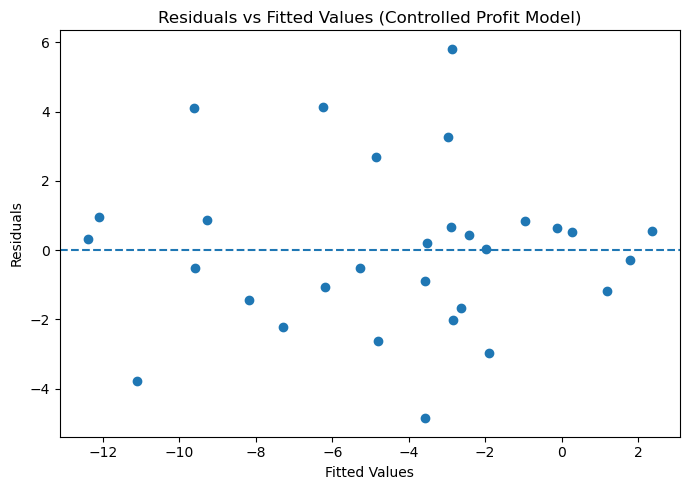

In [52]:
## visual for controlled profit model

# create fitted/predicted values variable
fitted_ctrl = controlled_profit_model.fittedvalues

# create residuals variable
resid_ctrl = controlled_profit_model.resid

# plot values on a scatterplot
plt.figure(figsize=(7,5))
plt.scatter(fitted_ctrl, resid_ctrl)
plt.axhline(y=0, linestyle='--')
plt.title("Residuals vs Fitted Values (Controlled Profit Model)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

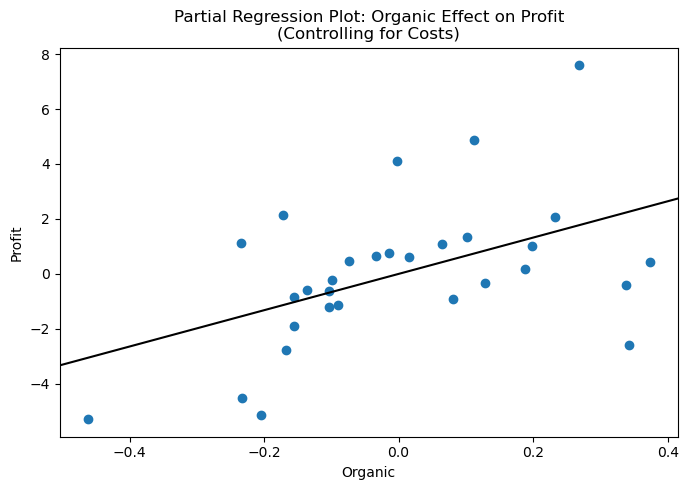

In [58]:
## visual

# plot relationship between profit and organic (partial regression)
fig = plt.figure(figsize = (7,5))

plot_partregress(endog = 'profit',
                 exog_i = 'organic_bin',
                 exog_others = ['feed_costs', 'operating_costs', 'overhead'],
                 data = milk_df,
                 obs_labels = False, 
                 ax = fig.add_subplot(111))

# add plot details
plt.title("Partial Regression Plot: Organic Effect on Profit\n(Controlling for Costs)")
plt.xlabel("Organic")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

In [112]:
## new equation idea

milk_df["profit_real"] = milk_df["profit"] / milk_df["cpi_index"]
milk_df["feed_cost_real"] = milk_df["feed_costs"] / milk_df["cpi_index"]
milk_df["operating_costs_real"] = milk_df["operating_costs"] / milk_df["cpi_index"]
milk_df["milk_sold_real"] = milk_df["milk_sold"] / milk_df["cpi_index"]



model_sales = smf.ols(
    "milk_sold_real ~ organic_bin + feed_cost_real + operating_costs_real",
    data = milk_df
).fit()

model_sales.summary()

model_profit = smf.ols(
    "profit_real ~ organic_bin + feed_cost_real + labor_cost_real + capital_cost_real",
    data=milk_df
).fit()

model_profit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         milk_sold_real   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     61.13
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           6.57e-12
Time:                        12:44:25   Log-Likelihood:                -64.121
No. Observations:                  30   AIC:                             136.2
Df Residuals:                      26   BIC:                             141.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.6641      2.651      1.759      0.090      -0.785      10.114
organic_bin              5.0755      1.565      3.243      0.003       1.858       8.293
feed_cost_real          -0.6504      0.676     -0.962      0.345      -2.040       0.739
operating_costs_real     1.3966      0.620      2.251      0.033       0.121       2.672
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.676
Skew:                           0.276   Prob(JB):                        0.713
Kurtosis:                       2.515   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

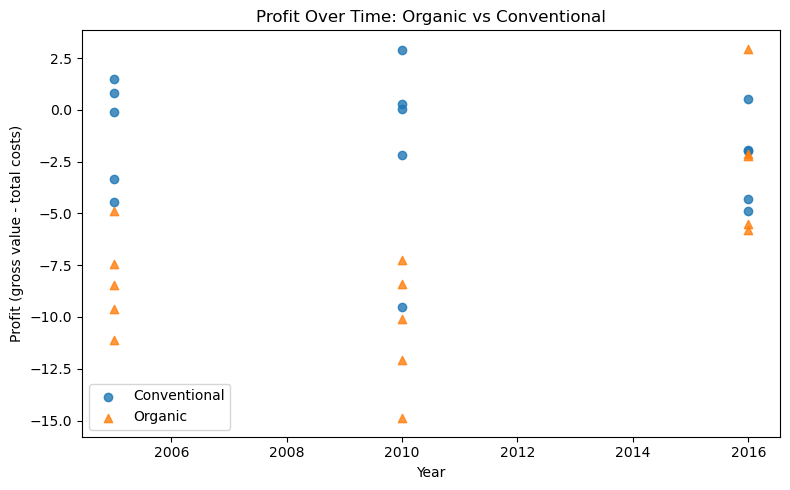

In [66]:
### data exploration

## explore profit trends

# split organic and conventional data
org = milk_df[milk_df["Organic"] == 1]
conv = milk_df[milk_df["Organic"] == 0]

# plot raw profits on scatterplot 
plt.figure(figsize = (8, 5))
plt.scatter(conv["Year"], conv["profit"], alpha = 0.8, label = "Conventional", marker = "o")
plt.scatter(org["Year"], org["profit"], alpha = 0.8, label = "Organic", marker = "^")

# add plot details
plt.xlabel("Year")
plt.ylabel("Profit (gross value - total costs)")
plt.title("Profit Over Time: Organic vs Conventional")
plt.legend()
plt.tight_layout()
plt.show()